In [1]:
url='https://github.com/edyoda/data-science-complete-tutorial/blob/master/Data/house_rental_data.csv.txt'
# The above url is of the main github location for importing it, the raw view url is needed which is below
url='https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt'

In [2]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import math
from scipy import stats

In [3]:
%matplotlib inline

In [4]:
# Assigning the dataset to a variable'df' as a pandas dataframe
df=pd.read_csv(url)

In [5]:
# Glancing at dataset
df

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...,...
640,644,1359.156,7,15,3,2,2,45000
641,645,377.148,4,10,1,1,1,24800
642,646,740.064,13,14,1,1,1,45000
643,647,1707.840,3,14,3,2,2,65000


In [6]:
# Deliting first column
del df['Unnamed: 0']

In [7]:
df

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000
643,1707.840,3,14,3,2,2,65000


## 1. Insights into the data

In [8]:
rows,cols=df.shape
print('Number of rows : ',rows,'\nNumber of columns : ',cols)

Number of rows :  645 
Number of columns :  7


In [9]:
# Getting statistics of every column
df.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [10]:
# Info of the dataframe and its columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 35.4 KB


In [11]:
# Checking for null values
df.isnull().sum()

Sqft           0
Floor          0
TotalFloor     0
Bedroom        0
Living.Room    0
Bathroom       0
Price          0
dtype: int64

In [12]:
# Renaming a misspelt column name
df.rename({'Living.Room':'Livingroom'},axis=1,inplace=True)

In [13]:
df

,Sqft,Floor,TotalFloor,Bedroom,Livingroom,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000
643,1707.840,3,14,3,2,2,65000


## 2.Visualization

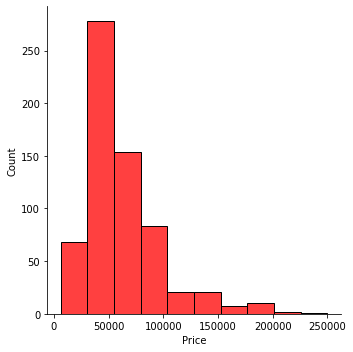

In [14]:
sns.displot(df['Price'],color='red',bins=10)

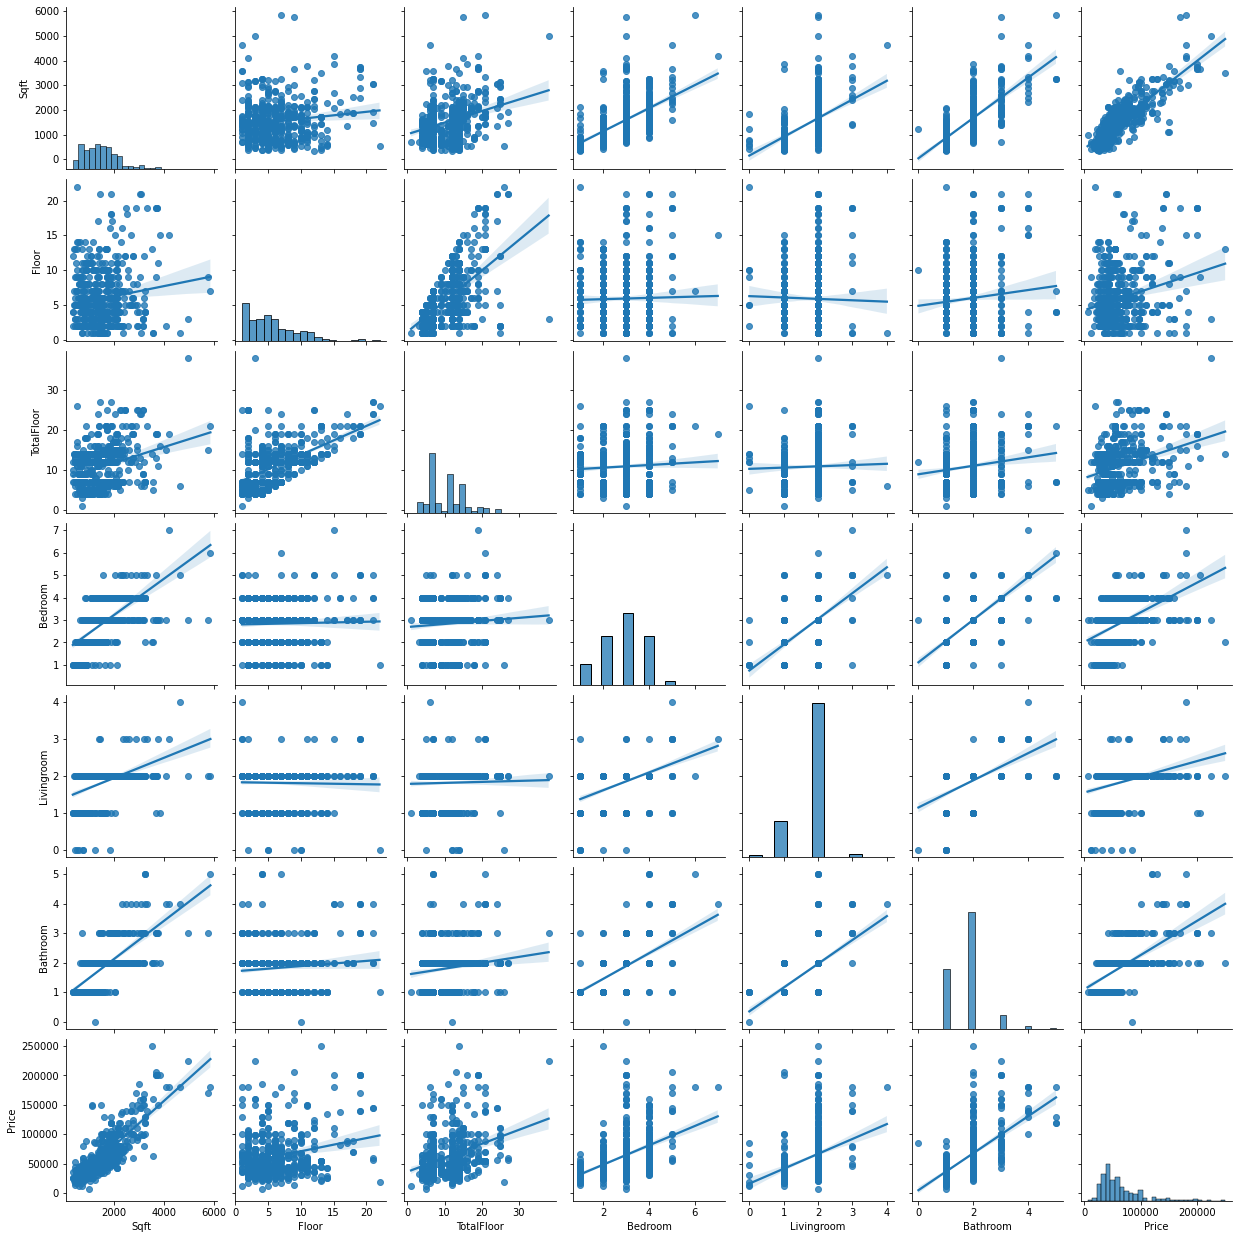

In [15]:
sns.pairplot(df,kind='reg')

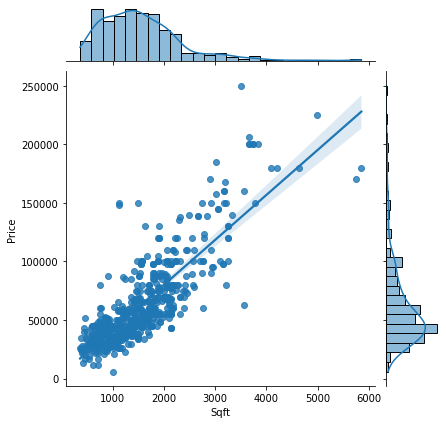

In [16]:
# Comparing Sqft with Price in a jointplot with reg

sns.jointplot(x='Sqft',y='Price',data=df,kind='reg')

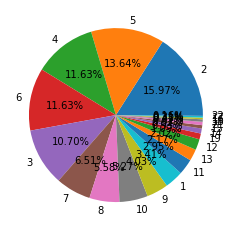

In [17]:
# Pie chart of number of floors
plt.pie(df['Floor'].value_counts(),labels=df['Floor'].value_counts().index,autopct='%1.2f%%')
plt.show()

## 3. Managing data for training and testing

In [18]:
# the dataset
df

,Sqft,Floor,TotalFloor,Bedroom,Livingroom,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
640,1359.156,7,15,3,2,2,45000
641,377.148,4,10,1,1,1,24800
642,740.064,13,14,1,1,1,45000
643,1707.840,3,14,3,2,2,65000


- **Pre-processing**

In [19]:
# Dealing with outliers using z-score
z = np.abs(stats.zscore(df)) # z-score for each entry


df_o = df[(z < 3).all(axis=1)].reset_index(drop=True)  # removing entries above threshold of z-score 3

In [20]:
df.shape , df_o.shape

((645, 7), (608, 7))

`Total of 37 outliers were removed`

In [21]:
df_o

,Sqft,Floor,TotalFloor,Bedroom,Livingroom,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
603,1359.156,7,15,3,2,2,45000
604,377.148,4,10,1,1,1,24800
605,740.064,13,14,1,1,1,45000
606,1707.840,3,14,3,2,2,65000


In [22]:
# choosing features using correlation
corr = df_o.corr()

<AxesSubplot:>

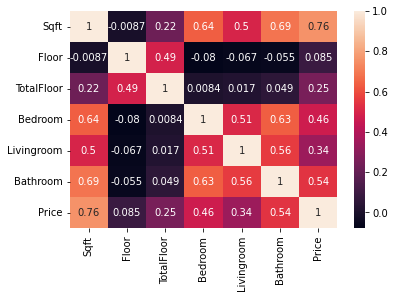

In [23]:
sns.heatmap(corr, annot=True)

In [24]:
# We choose just the features whose correlation with target column(Price) is greater than 0.5
corr['Price'][corr['Price']>0.5]

Sqft        0.758197
Bathroom    0.536768
Price       1.000000
Name: Price, dtype: float64

In [25]:
# So, Features would be
Features=['Sqft','Bathroom']

In [26]:
# The features
X = df[Features]

# The target
Y = df['Price']

In [27]:
X.head()

,Sqft,Bathroom
0,1177.698,2
1,2134.800,2
2,1138.560,1
3,1458.780,2
4,967.776,2


In [28]:
Y.head()

0    62000
1    78000
2    58000
3    45000
4    45000
Name: Price, dtype: int64

In [29]:
# Scaling the feature dataset using standard dataset
scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[-0.45639303  0.27691822]
 [ 0.79179777  0.27691822]
 [-0.50743429 -1.18711665]
 ...
 [-1.02712711 -1.18711665]
 [ 0.23498403  0.27691822]
 [-0.19654662 -1.18711665]]


In [31]:
# Splitting these datasets into training and testing

x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.25,random_state=7)

In [36]:
# Checking splitted data
x_train.shape

(483, 2)

In [37]:
y_train.shape

(483,)

In [38]:
x_test.shape

(162, 2)

In [39]:
y_test.shape

(162,)

## 4. Modelling and finding better value for k

In [40]:
# Modelling using a k value of 5
model=KNeighborsRegressor(n_neighbors=5)
model.fit(x_train,y_train) # fitting the model
y_pred=model.predict(x_test) # predicting values

# calculating root mean squared error (RMSE)
error = math.sqrt(mean_squared_error(y_test,y_pred))
print(error)

19231.50678550663


In [41]:
# Finding optimal value of k so that RMSE is minimum

rmse_val=[]
for i in range(1,51):
    model=KNeighborsRegressor(n_neighbors=i)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    error=math.sqrt(mean_squared_error(y_test,y_pred))
    rmse_val.append((error,i))
print(rmse_val)   

[(21274.98404563386, 1), (18759.52481169216, 2), (19356.118705840676, 3), (19016.208565058776, 4), (19231.50678550663, 5), (18409.93341956619, 6), (17923.99569485867, 7), (17787.064086789203, 8), (17916.4026177627, 9), (17662.7179300492, 10), (17129.842680439495, 11), (16678.847896114352, 12), (16562.6334387368, 13), (16468.38797930557, 14), (16537.756493494122, 15), (16486.140656443647, 16), (16434.412984399667, 17), (16282.638086933399, 18), (16248.32972544605, 19), (16219.531980984406, 20), (16138.156433087917, 21), (16192.262348233178, 22), (16367.295992849655, 23), (16270.029642999863, 24), (16370.731680627512, 25), (16401.59278852578, 26), (16467.68004909315, 27), (16502.920976215, 28), (16537.66977914823, 29), (16520.953621443055, 30), (16669.16715364385, 31), (16742.062308320812, 32), (16672.240959522704, 33), (16708.264897584137, 34), (16658.4345195874, 35), (16684.1485813613, 36), (16642.621319964517, 37), (16633.813816015834, 38), (16536.515126219285, 39), (16626.96493103775

In [42]:
# Getting minimum RMSE value
print(min(rmse_val))

(16138.156433087917, 21)


`Since RMSE is lowest at k value of 21 in tested range of 1 to 50, it is to be considered to be optimal`

In [43]:
# Modelling using k value of 21
model=KNeighborsRegressor(n_neighbors=21)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)


In [44]:
# Final predicted values alond with true values
pd.DataFrame(data={'Prediction':y_pred,'Actual':y_test})

,Prediction,Actual
582,47095.190476,45000
221,72809.476190,55000
333,134745.904762,160000
70,38090.428571,25000
586,40880.952381,43000
...,...,...
541,50513.190476,31000
23,60899.428571,105000
273,31166.619048,17000
384,66456.619048,44000


# Using all columns as features

In [45]:
df_o

,Sqft,Floor,TotalFloor,Bedroom,Livingroom,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
603,1359.156,7,15,3,2,2,45000
604,377.148,4,10,1,1,1,24800
605,740.064,13,14,1,1,1,45000
606,1707.840,3,14,3,2,2,65000


In [46]:
X=df_o.iloc[:,:6]  #Features
Y=df_o.iloc[:,6]  #Target

In [47]:
# Scaling using Standard scaler
scaler=StandardScaler()
X_all_scaled = scaler.fit_transform(X)
X_all_scaled

array([[-0.42671271, -1.1029462 , -0.75886491, -0.827359  ,  0.44150012,
         0.44722506],
       [ 1.10409925, -0.16984144, -0.75886491,  1.24274088,  0.44150012,
         0.44722506],
       [-0.48931097, -0.16984144, -0.75886491, -0.827359  ,  0.44150012,
        -1.32998302],
       ...,
       [-1.12667506,  2.31843792,  0.77108727, -1.86240894, -1.99879144,
        -1.32998302],
       [ 0.42120916, -0.79191128,  0.77108727,  0.20769094,  0.44150012,
         0.44722506],
       [-0.10803067,  0.14119348, -0.75886491,  0.20769094,  0.44150012,
        -1.32998302]])

In [48]:
# Splitting these datasets into training and testing

x_train,x_test,y_train,y_test=train_test_split(X_all_scaled,Y,test_size=0.25,random_state=7)

In [49]:
# Finding optimal value of k so that RMSE is minimum

rmse_val=[]
for i in range(1,51):
    model=KNeighborsRegressor(n_neighbors=i)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    error=math.sqrt(mean_squared_error(y_test,y_pred))
    rmse_val.append((error,i))
print(rmse_val)   

[(20717.564631725825, 1), (19535.497548617477, 2), (19403.135186429678, 3), (18201.34378200703, 4), (18000.48291382908, 5), (18231.20522236571, 6), (18121.842835448202, 7), (18092.89493396194, 8), (17865.835640686557, 9), (17838.658720506723, 10), (17547.449836823198, 11), (17652.510313495233, 12), (17788.915672697407, 13), (17739.58185782576, 14), (17628.6277327127, 15), (17850.23529364521, 16), (18061.55710260046, 17), (18111.40486406107, 18), (18183.084621083308, 19), (18107.808470788776, 20), (18023.096975607852, 21), (18032.975771530666, 22), (17905.63771673758, 23), (17959.397614906513, 24), (17966.142560805867, 25), (17864.27157802578, 26), (17884.660758406357, 27), (17947.22310100951, 28), (18048.861528806643, 29), (18176.126831317793, 30), (18092.7130243446, 31), (18120.695393041136, 32), (18153.93353131439, 33), (18220.927870877065, 34), (18285.033549814478, 35), (18365.796791909488, 36), (18287.43599319165, 37), (18344.424165935474, 38), (18348.064894403404, 39), (18415.2709

In [50]:
# Getting minimum RMSE value
print(min(rmse_val))

(17547.449836823198, 11)


`Since RMSE is lowest at k value of 11 in tested range of 1 to 50, it is to be considered to be optimal`

In [51]:
# Modelling using k value of 11
model=KNeighborsRegressor(n_neighbors=11)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)


In [52]:
# Final predicted values alond with true values
pd.DataFrame(data={'Prediction':y_pred,'Actual':y_test})

,Prediction,Actual
401,41345.454545,51000
283,54116.090909,44999
414,73454.454545,78000
482,78444.363636,70000
419,51135.454545,45000
...,...,...
323,48772.727273,39000
593,54363.636364,45000
289,58890.818182,37000
409,35805.818182,28000
